<a href="https://colab.research.google.com/github/markdevine/ET5003_SEM1_2021-2/blob/main/ET5003_KaggleCompetition_MarkDevine_19187289.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
##ET5003 - MACHINE LEARNING APPLICATIONS 

###Instructor: Enrique Naredo
###ET5003_KaggleCompetition

In [9]:
#@title Current Date
Today = '2021-10-11' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Team_Number = "2" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
Student_ID&Name = "" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Draft #@param ["Draft", "Final"] {type:"raw"}
Submission = False #@param {type:"boolean"}

# INTRODUCTION

The approach is to conduct exploratory data analysis, data cleaning and preperation, before applying the natural language processing techniques presented in the module for the purposes of house price prediction.

Then apply Bayesian Neural Networks to the same set of data again for the purpose of house price prediction.

Compare the models results for accuracy levels.

***The goal is to use advanced Machine Learning methods to predict House price.***

## Imports

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# expand the display of the notebook when run
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
# standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# to plot
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

# to generate classification, regression and clustering datasets
import sklearn.datasets as dt

# to create data frames
from pandas import DataFrame

# to generate data from an existing dataset
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [77]:
# Scikit-learn is an open source machine learning library 
# that supports supervised and unsupervised learning
# https://scikit-learn.org/stable/
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Regular expression operations
#https://docs.python.org/3/library/re.html
import re 

# Natural Language Toolkit
# https://www.nltk.org/install.html
import nltk

# Stemming maps different forms of the same word to a common “stem” 
# https://pypi.org/project/snowballstemmer/
from nltk.stem import SnowballStemmer

# https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords

# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

In [7]:
!pip install gpy

     |████████████████████████████████| 959 kB 15.4 MB/s 
     |████████████████████████████████| 71 kB 7.8 MB/s 
  Created wheel for gpy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565122 sha256=1ebc8acd0a3132b77d82dbd7a71516882e1997fc9f887fcfe633a0fbfed0b11b
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102565 sha256=a6ffdab9f12c01f61c6ad9653136f4ff5c366e3f7fb7ce2ae526fcb0982343f2
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built gpy paramz


In [8]:
import GPy as GPy
import numpy as np
import pylab as pb
import pymc3 as pm
import arviz as az

In [9]:
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11

# Define the color maps for plots
color_map = plt.cm.get_cmap('RdYlBu')
color_map_discrete = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","cyan","magenta","blue"])

In [10]:
# display complete contents and information of a dataframe without any kind of truncation (https://thispointer.com/python-pandas-how-to-display-full-dataframe-i-e-print-all-rows-columns-without-truncation/)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

# DATASET

Extract from this [paper](https://ieeexplore.ieee.org/document/9300074):

* House prices are a significant impression of the economy, and its value ranges are of great concerns for the clients and property dealers. 

* Housing price escalate every year that eventually reinforced the need of strategy or technique that could predict house prices in future. 

* There are certain factors that influence house prices including physical conditions, locations, number of bedrooms and others.


1. [Download the dataset](https://github.com/UL-CS6134/CS6134_SEM1_2021-2/tree/main/Week-5). 

2. Upload the dataset into your folder.



The challenge is to predict the final price of each house.

### Loading the housing price dataset

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Path, copy the path from your Drive
path = '/content/drive/MyDrive/Colab Notebooks/Data/Kaggle/'

# Housing Price Data
train_data = path + 'HousePrice_Train.csv'
test_data = path + 'HousePrice_Test.csv'

# train data
df_train = pd.read_csv(train_data)
# X_train_original = df_train.drop("label",axis=1).values
# y_train = df_train.label.values
print(df_train.shape)

# test data
df_test = pd.read_csv(test_data)
# X_test_original = df_test.drop("label",axis=1).values
# y_test = df_test.label.values
print(df_test.shape)

(1638, 14)
(702, 13)


## Training & Test Data

In [23]:
# split data into training and test
from sklearn.model_selection import train_test_split

# training: 70% (0.7), test: 30% (0.3) 
# you could try any other combination 
# but consider 50% of training as the low boundary
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### Exploratory Data Analysis and dataset preperation

### Exploratory Data Analysis and dataset preperation

1.   Training dataset
2.   Test dataset



In [ ]:
# show the first few data frame rows 
df_train.head(3)

In [ ]:
# Generate descriptive statistics
df_train.describe()

In [ ]:
# show first data frame rows 
df_test.head(3)

In [ ]:
# Generate descriptive statistics
df_test.describe()

In [18]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

Index            1638
ID               1638
Location         142 
Num_Bathrooms    11  
Num_Beds         11  
BER_class        16  
Description      1638
Services         31  
Features         1118
Latitude         1604
Longitude        1605
Type             10  
Surface          666 
Price            267 
dtype: int64


There are no unique values for any of the features.

In [19]:
# let's check the missing values across the attributes as a percentage (https://medium.com/dunder-data/finding-the-percentage-of-missing-values-in-a-pandas-dataframe-a04fa00f84ab)
df_train.isna().mean().round(4) * 100

Index            0.00 
ID               0.00 
Location         0.00 
Num_Bathrooms    0.00 
Num_Beds         0.00 
BER_class        15.32
Description      0.00 
Services         64.77
Features         0.00 
Latitude         0.00 
Longitude        0.00 
Type             0.00 
Surface          0.00 
Price            0.00 
dtype: float64

The dataset is mostly complete so we replace the missing values in the BER_class feature with the median value. 

The fact that the Services feature has 65% missing values doesn't matter as I intend on combining the test features, Description, Services and Features for the NLP. It probably won't add much value but let's keep it for the instances that have it.

In [20]:
# let's check the BER_class values
print(df_train['BER_class'].sort_values().unique())

['A1' 'A2' 'A3' 'B1' 'B2' 'B3' 'C1' 'C2' 'C3' 'D1' 'D2' 'E1' 'E2' 'F' 'G'
 'SINo666of2006exempt' nan]


In [21]:
# let's check the BER_class values for NaNs
df_train.BER_class.drop_duplicates()

0      C3                 
1      D1                 
2      A3                 
3      E1                 
7      NaN                
10     G                  
11     E2                 
15     C2                 
16     SINo666of2006exempt
19     F                  
24     B2                 
27     C1                 
36     D2                 
63     B3                 
146    B1                 
184    A2                 
800    A1                 
Name: BER_class, dtype: object

In [22]:
# encode the ordinal BER_class
# create a mapper

scale_mapper = {
    'A1': 1, 
    'A2': 2, 
    'A3': 3, 
    'B1': 4, 
    'B2': 5, 
    'B3': 6, 
    'C1': 7, 
    'C2': 8, 
    'C3': 9, 
    'D1': 10, 
    'D2': 11, 
    'E1': 12, 
    'E2': 13, 
    'F': 14, 
    'G': 15,
    'SINo666of2006exempt': 16
}

df_train['BER_class'] = df_train['BER_class'].replace(scale_mapper)
df_test['BER_class'] = df_test['BER_class'].replace(scale_mapper)
df_train.head(15)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,9.0,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,apartment,67.00,195000
1,2,12320330,North Strand,1,2,10.0,"13 Northbrook Terrace is a charming red brick period home set in a secluded location within walking distance of Dublin's City Centre. Behind the red brick façade the light filled accommodation offers a contemporary feel while maintaining charming original features such as high ceilings, ceiling coving, beautiful cast iron fireplaces and antique style radiators. The welcoming entrance hallway is finished with beautiful American Oak flooring, a fan light above the door floods this space with natural light, this leads through to two spacious interconnecting reception rooms, from here the garden is accessed through French doors. The kitchen is located at the end of the hallway this space is fitted with modern high gloss wall and floor units there is plumbing for a dishwasher and washing machine. Ample dining space creates an ideal place to relax. A feature floor to ceiling window floods this space with natural light. French doors lead to the garden. Upstairs there are two generous double bedrooms both with feature fireplaces, sash windows and American Oak flooring. The bathroom on the return with feature roll top bath completes the accommodation on this level. The further appeal of this charming home is the converted attic space, flooded with natural light with the aid of sky lights, it offers an ideal space for a wide variety of uses. \n\n\rOutside the secluded south facing rear garden is low maintenance, its laid in gravel and features a raised patio area making this sun trap an ideal space to dine alfresco. The ideal location ensures this charming home is walking distance to Connolly Station for Dart &amp; Luas with the Cross-City Luas stop at Marlborough Street, IFSC and the Dublin Dockland's also accessible on foot. There are numerous shops, restaurants and schools in the immediate locality. The Mater hospital, O'Connell Street and city colleges are all easily accessible on foot. All in all, this i

In [23]:
# replace the nans with the median value of BER_class
df_train['BER_class'].fillna(df_train['BER_class'].median(), inplace=True)

In [24]:
# let's double check the BER_class values for NaNs
df_train.BER_class.drop_duplicates()

0      9.0 
1      10.0
2      3.0 
3      12.0
10     15.0
11     13.0
15     8.0 
16     16.0
19     14.0
24     5.0 
27     7.0 
36     11.0
63     6.0 
146    4.0 
184    2.0 
800    1.0 
Name: BER_class, dtype: float64

In [25]:
# let's check the property_type values
print (df_train['Type'].sort_values().unique())

['apartment' 'bungalow' 'detached' 'duplex' 'end-of-terrace'
 'semi-detached' 'site' 'studio' 'terraced' 'townhouse']


No Nans with the Type feature so no need to do anything.

In [26]:
# encode the ordinal Type 
# create a mapper

scale_mapper = {
    'apartment': 1, 
    'bungalow': 2, 
    'detached': 3, 
    'duplex': 4, 
    'end-of-terrace': 5, 
    'semi-detached': 6, 
    'site': 7, 
    'studio': 8, 
    'terraced': 9, 
    'townhouse': 10
}

df_train['Type'] = df_train['Type'].replace(scale_mapper)
df_test['Type'] = df_test['Type'].replace(scale_mapper)
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Description,Services,Features,Latitude,Longitude,Type,Surface,Price
0,1,12409116,Ongar,2,2,9.0,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc.",NaN,None,53.396659,-6.438791,1,67.0,195000


This is starting to look like a much cleaner dataset that seems appriopriate for the prediction of the final price of a house.

Next let's check the latitude	and longitude attributes as they would be expected to have an impact on the price of a house ("location, location, location").

<Figure size 720x720 with 0 Axes>

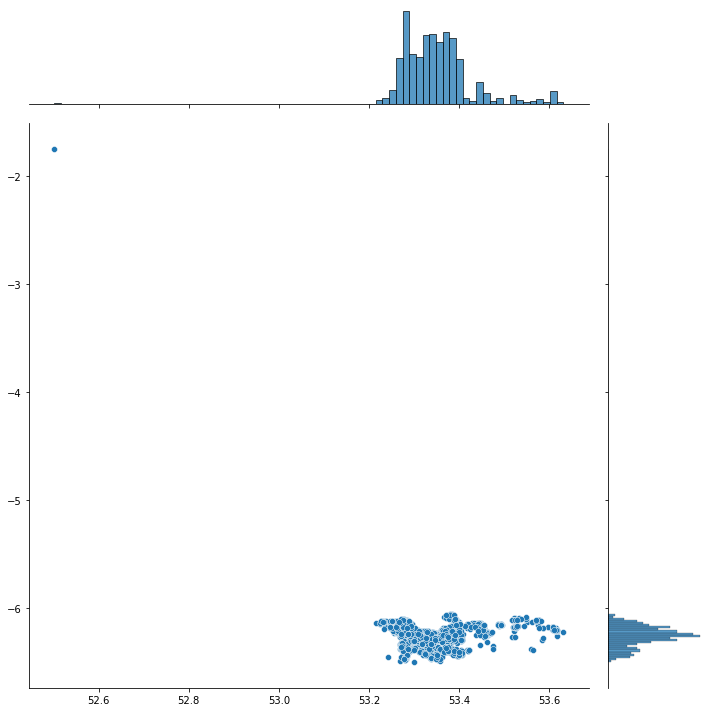

<function seaborn.utils.despine>

In [27]:
# plot the the latitude and longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

The houses for sale are concentrated in quite a small area however there is one outlier which we will remove, essentially the one that is less than longitude of '-2' and latitude less than '53.0'.

In [28]:
index_train = df_train[(df_train['Longitude'] > -2.0)|(df_train['Latitude'] < 53.0)].index
index_test = df_test[(df_test['Longitude'] > -2.0)|(df_test['Latitude'] < 53.0)].index
df_train.drop(index_train, inplace=True)
df_test.drop(index_test, inplace=True)
df_train['Longitude'].describe()

count    1637.000000
mean    -6.257841   
std      0.091825   
min     -6.497000   
25%     -6.309640   
50%     -6.247821   
75%     -6.194319   
max     -6.054719   
Name: Longitude, dtype: float64

<Figure size 720x720 with 0 Axes>

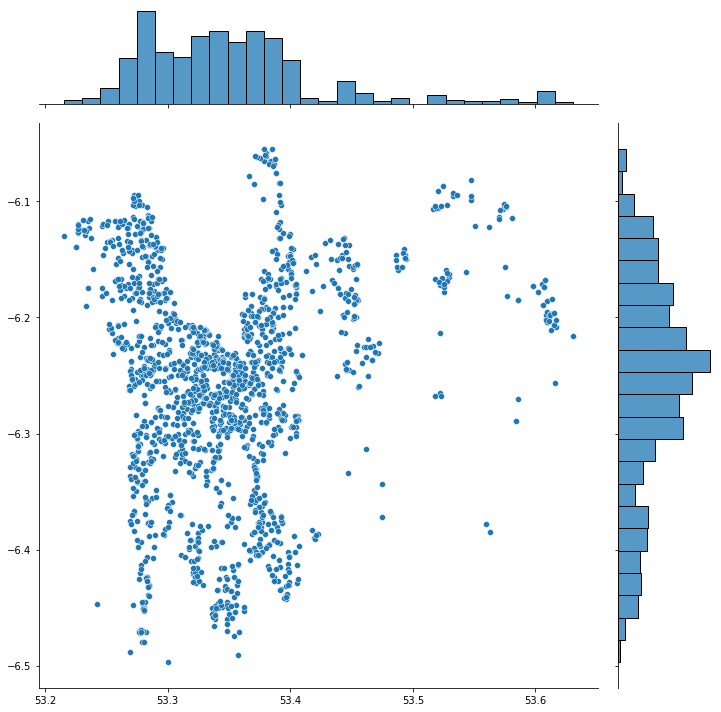

<function seaborn.utils.despine>

In [29]:
# plot the the Latitude and Longitude attributes (https://deepnote.com/@jz/House-prices-prediction-DuSZvuoNSEmb5cCKcsW4BQ)
plt.figure(figsize=(10,10))
sns.jointplot(x=df_train.Latitude.values, y=df_train.Longitude.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

Eliminating the longitude and latitude outlier presents us with a very clean view of remaining data with a high concentration of houses between longitude 6.0 and 6.5 and latitude 53.2 and 53.7. But let's also check the number of distinct categories per attribute, that is, the cardinality:

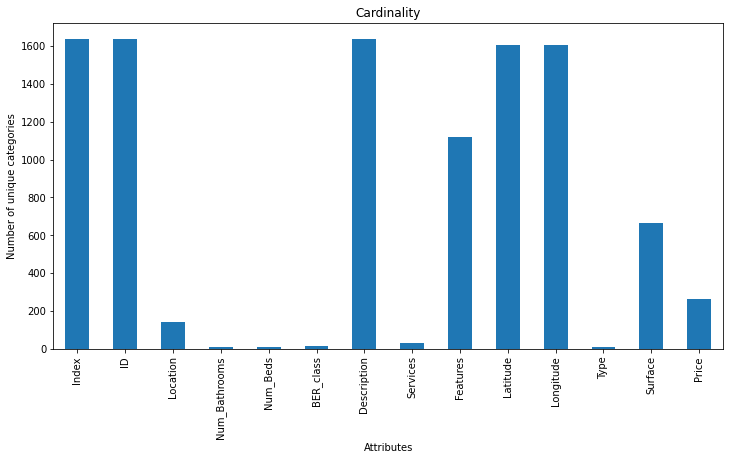

In [30]:
# plot the cardinality of the attributes
df_train.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Attributes')
plt.title('Cardinality')
plt.show()

Based on previous observations and the attribute cardinality we will check the following attributes for outliers; Num_Bathrooms, Num_Beds, Type, Surface and Price

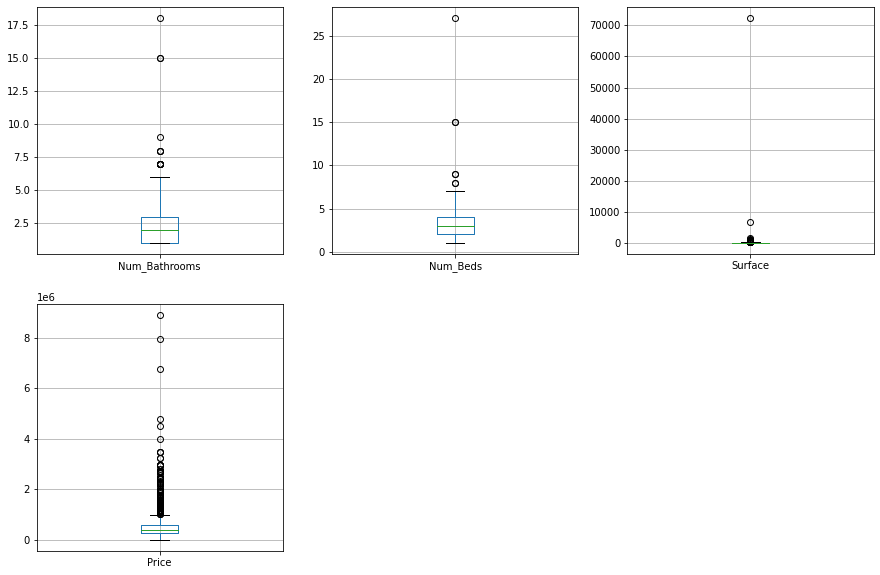

In [31]:
# plot a boxplot of the features Num_Bathrooms, Num_Beds, Surface and Price
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(2, 3, 1)
df_train.boxplot(column='Num_Bathrooms')
ax2 = fig.add_subplot(2, 3, 2)
df_train.boxplot(column='Num_Beds')
ax3 = fig.add_subplot(2, 3, 3)
df_train.boxplot(column='Surface')
ax4 = fig.add_subplot(2, 3, 4)
df_train.boxplot(column='Price')
plt.show()

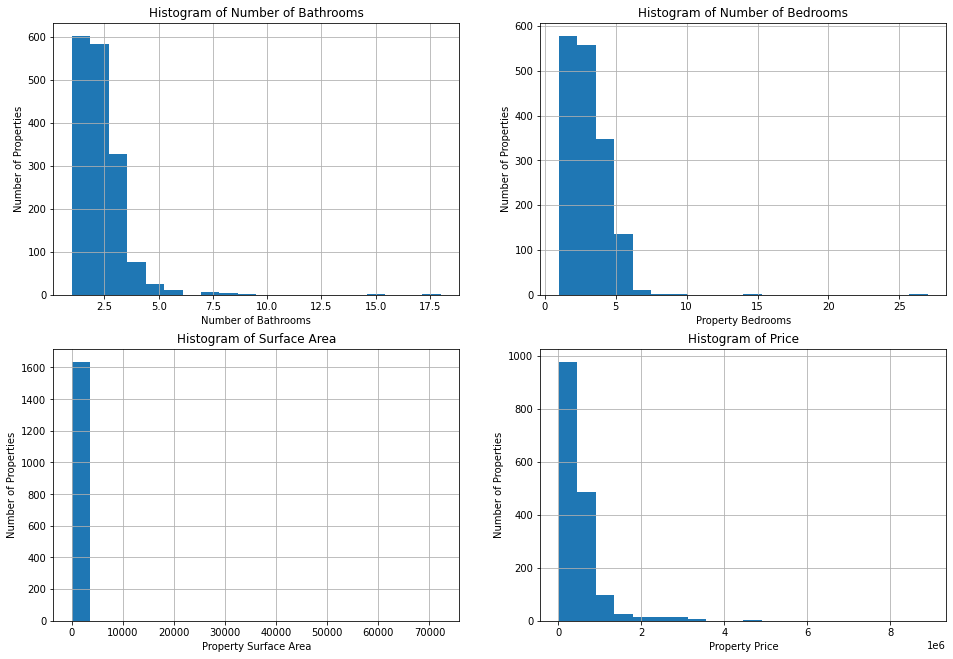

In [32]:
# plot the histograms for the attributes price, bathrooms, beds, ber_classification, property_type, surface
fig = plt.figure(figsize=(16,35))

ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title("Histogram of Number of Bathrooms")
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Properties')
df_train['Num_Bathrooms'].hist(bins=20)

ax2 = fig.add_subplot(6, 2, 2)
ax2.set_title("Histogram of Number of Bedrooms")
ax2.set_xlabel('Property Bedrooms')
ax2.set_ylabel('Number of Properties')
df_train['Num_Beds'].hist(bins=20)

ax3 = fig.add_subplot(6, 2, 3)
ax3.set_title("Histogram of Surface Area")
ax3.set_xlabel('Property Surface Area')
ax3.set_ylabel('Number of Properties')
df_train['Surface'].hist(bins=20)

ax4 = fig.add_subplot(6, 2, 4)
ax4.set_title("Histogram of Price")
ax4.set_xlabel('Property Price')
ax4.set_ylabel('Number of Properties')
df_train['Price'].hist(bins=20)

plt.show()

There are clearly outliers for the bedroom and bathroom features. We will remove those properties that have greater than either 6 bedrooms or bathrooms.

In [33]:
# let's check the bathrooms values
df_train.Num_Bathrooms.drop_duplicates()

0       2 
1       1 
2       3 
13      4 
94      6 
218     7 
279     5 
557     15
612     9 
861     8 
1378    18
Name: Num_Bathrooms, dtype: int64

In [34]:
# remove properties with greater than 6 bathrooms (https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a)
indexNames = df_train[df_train['Num_Bathrooms'] >= 7].index
df_train.drop(indexNames , inplace=True)

In [35]:
# let's check the bathrooms values
df_train.Num_Bathrooms.drop_duplicates()

0      2
1      1
2      3
13     4
94     6
279    5
Name: Num_Bathrooms, dtype: int64

In [36]:
# let's check the bedrooms values
df_train.Num_Beds.drop_duplicates()

0      2
2      3
4      4
13     5
26     1
49     6
94     7
342    9
Name: Num_Beds, dtype: int64

In [37]:
# remove properties with greater than 6 bedrooms (https://medium.com/@harsz89/how-to-drop-rows-based-on-column-values-using-pandas-dataframe-38cf50e4c95a)
indexNames = df_train[df_train['Num_Beds'] >= 7].index
df_train.drop(indexNames , inplace=True)

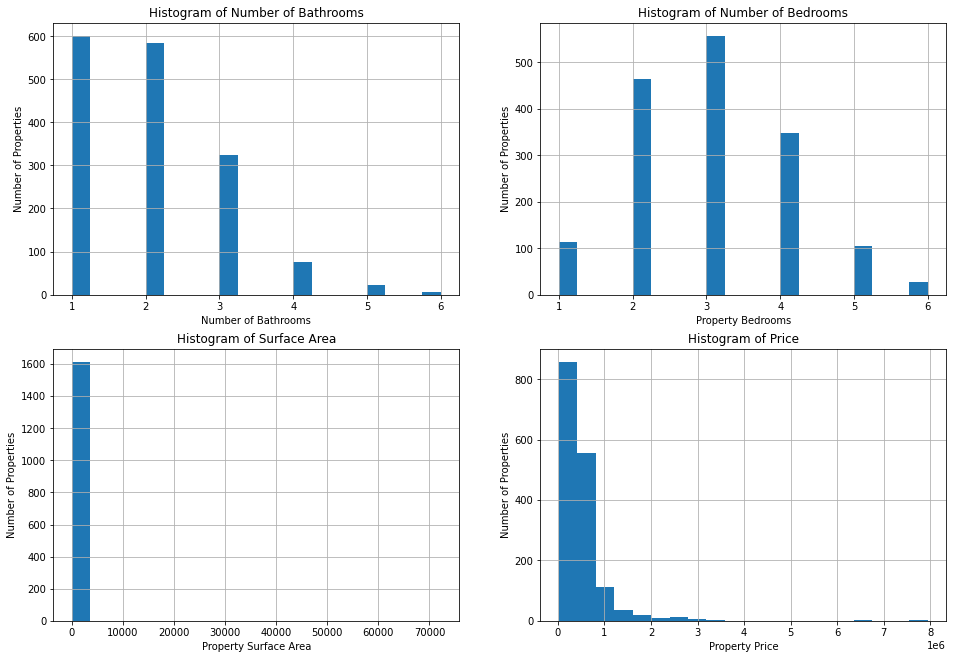

In [38]:
# plot the histograms for the attributes price, bathrooms, beds, ber_classification, property_type, surface
fig = plt.figure(figsize=(16,35))

ax1 = fig.add_subplot(6, 2, 1)
ax1.set_title("Histogram of Number of Bathrooms")
ax1.set_xlabel('Number of Bathrooms')
ax1.set_ylabel('Number of Properties')
df_train['Num_Bathrooms'].hist(bins=20)

ax2 = fig.add_subplot(6, 2, 2)
ax2.set_title("Histogram of Number of Bedrooms")
ax2.set_xlabel('Property Bedrooms')
ax2.set_ylabel('Number of Properties')
df_train['Num_Beds'].hist(bins=20)

ax3 = fig.add_subplot(6, 2, 3)
ax3.set_title("Histogram of Surface Area")
ax3.set_xlabel('Property Surface Area')
ax3.set_ylabel('Number of Properties')
df_train['Surface'].hist(bins=20)

ax4 = fig.add_subplot(6, 2, 4)
ax4.set_title("Histogram of Price")
ax4.set_xlabel('Property Price')
ax4.set_ylabel('Number of Properties')
df_train['Price'].hist(bins=20)

plt.show()

It looks like all outliers have been eliminated.

In [39]:
# check how many instances we have left
print(df_train.shape)

(1615, 14)


In [40]:
# check for missing values 
print('Number of missing values for each feature')
df_train.isna().sum()

Number of missing values for each feature


Index            0   
ID               0   
Location         0   
Num_Bathrooms    0   
Num_Beds         0   
BER_class        0   
Description      0   
Services         1041
Features         0   
Latitude         0   
Longitude        0   
Type             0   
Surface          0   
Price            0   
dtype: int64

Even though there are missing values in the services we will keep them for the NLP piece of work.

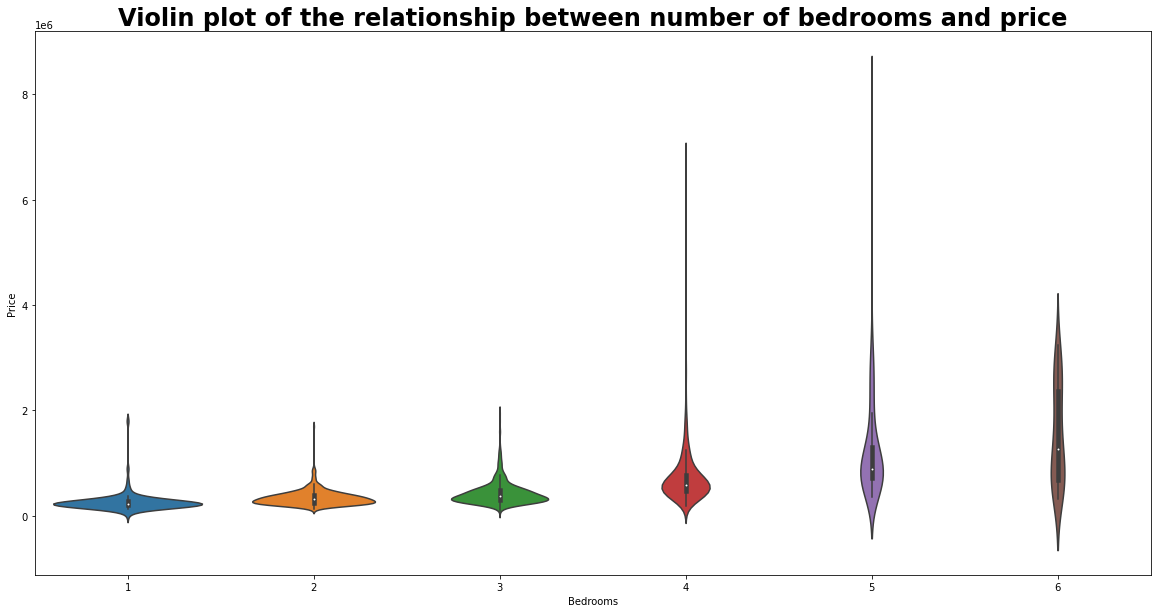

In [86]:
# examine the relationship between price and beds using a violin plot
sns.violinplot(data=df_train, x='Num_Beds', y='Price')
plt.title('Violin plot of the relationship between number of bedrooms and price', fontdict= { 'fontsize': 24, 'fontweight':'bold'})
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

The distribution of the data indicates the median price of a house increases gradually based on an increasing number of bedrooms, while also indicating some very high prices for houses with between 3 to 6 bedrooms.

We now have a complete dataset that is appropriate for natural language processing.

Natural language processing ([NLP](https://en.wikipedia.org/wiki/Natural_language_processing)) is a subfield of linguistics, computer science, and artificial intelligence.

* NLP concerned with the interactions between computers and human language.
* In particular how to program computers to process and analyze large amounts of natural language data. 
* The goal is a computer capable of "understanding" the contents of documents.
* Including the contextual nuances of the language within them. 
* The technology can then accurately extract information and insights contained in the documents.
* As well as categorize and organize the documents themselves. 

# NATURAL LANGUAGE PROCESSING

Your comments, explanation, and references here.

In [41]:
# combine the text features, Description, Services and Features
# https://stackoverflow.com/questions/33158417/pandas-combine-two-strings-ignore-nan-values
df_train['Property_Description'] = df_train['Description'].fillna('') + ' ' + df_train['Services'].fillna('') + ' ' + df_train['Features'].fillna('')

In [42]:
# drop the text features, Description, Services and Features
df_train.drop(['Description', 'Services', 'Features'], axis = 1, inplace = True)

In [43]:
# show the first data frame row
df_train.head(2)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,Ongar,2,2,9.0,53.396659,-6.438791,1,67.00,195000,"DNG are delighted to present to the market no. 5 Chipping Row. This two bedroom apartment comes to the market in excellent condition throughout. Viewers will be sure to see the meticulous care and attention the home owner has for this property. \n\r\nThis well-presented apartment comprises of an open plan living and dining room, kitchen, two spacious double bedrooms the master benefitting from the a large en-suite and an extensively tiled bathroom. This property benefits from own door access, designated car parking and a quiet and private location.\n\r\nChipping Row is well serviced by excellent public transport links to Dublin City centre. Dublin Airport, N3 / M3 and M50 are all within an easy reach. Local primary and secondary schools, Blanchardstown Shopping Centre are all within driving distance. Ongar village and all it has to offer including supermarket, restaurants, shops and pharmacy€TM is only a short walk away.\n\r\nViewing comes highly recommended.\n\r\nFeatures:\r\nGround floor two bedroom apartment\r\n67 sqm / 721 sqft\r\nBuilt c. 2005\r\nDouble glazed windows throughout\r\nElectric heating\r\nOwn door access\r\nDesignated and visitor car parking \r\nManagement fee €"" approx. €760\r\nManagement Company €"" CORE\n\n\r\nAccommodation\r\nLiving/dining room 5.2m x 3.3m\r\nLaminate flooring, feature fireplace, large window to the front of the property.\r\nKitchen 3.4m x 1\r\nLaminate flooring, wall and floor fitted kitchen units, plumbed for washing machine. \r\nBedroom 1 5.1m x 2.2m\r\nLarge double bedroom, fitted wardrobes, ample storage space, en-suite off.\r\nEn-suite 2.5m x 1.6m\r\nExtensively tiled, shower, whb, wc.\r\nBedroom 2 3.7m x 2.7m\r\nLarge double bedroom, fitted wardrobes, ample storage space.\r\nBathroom 2.5m x 1.7m\r\nExtensively tiled, bath with over-head shower, whb, wc. None"
1,2,12320330,North Strand,1,2,10.0,53.357129,-6.239779,9,95.97,425000,"13 Northbrook Terrace is a charming red brick period home set in a secluded location within walking distance of Dublin's City Centre. Behind the red brick façade the light filled accommodation offers a contemporary feel while maintaining charming original features such as high ceilings, ceiling coving, beautiful cast iron fireplaces and antique style radiators. The welcoming entrance hallway is finished with beautiful American Oak flooring, a fan light above the door floods this space with natural light, this leads through to two spacious interconnecting reception rooms, from here the garden is accessed through French doors. The kitchen is located at the end of the hallway this space is fitted with modern high gloss wall and floor units there is plumbing for a dishwasher and washing machine. Ample dining space creates an ideal place to relax. A feature floor to ceiling window floods this space with natural light. French doors lead to the garden. Upstairs there are two generous double bedrooms both with feature fireplaces, sash windows and American Oak flooring. The bathroom on the return with feature roll top bath completes the accommodation on this level. The further appeal of this charming home is the converted attic space, flooded with natural light with the aid of sky lights, it offers an ideal space for a wide variety of uses. \n\n\rOutside the secluded south facing rear garden is low maintenance, its laid in gravel and features a raised patio area making this sun trap an ideal space to dine alfresco. The ideal location ensures this charming home is walking distance to Connolly Station for Dart &amp; Luas with the Cross-City Luas stop at Marlborough Street, IFSC and the Dublin Dockland's also accessible on foot. There are numerous shops, restaurants and schools in the immediate locality. The Mater hospital, O'Connell Street and city colleges are all easily accessible on foot. All 

In [44]:
# remove anything that is not a letter from the property description
df_train['Property_Description'] = [re.sub('[^a-zA-Z]', ' ', t) for t in df_train['Property_Description']]

In [45]:
# make everything lowercase and remove all the leading and trailing spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: x.lower().strip())

In [46]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [47]:
# remove single character words from the property description
df_train['Property_Description'] = df_train['Property_Description'].str.replace(r'\b\w\b','').str.replace(r'\s+', ' ')

In [48]:
# remove duplicate spaces from the property description
df_train['Property_Description'] = df_train['Property_Description'].replace({' +':' '},regex=True)

In [49]:
# import english stopwords with nltk so they can be filtered out before processing
# https://towardsdatascience.com/how-to-clean-text-data-639375414a2f
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: ' '.join([word for word in x.split() if word not in (english_stopwords)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [50]:
# show the first data frame row
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,Ongar,2,2,9.0,53.396659,-6.438791,1,67.0,195000,dng delighted present market chipping row two bedroom apartment comes market excellent condition throughout viewers sure see meticulous care attention home owner property well presented apartment comprises open plan living dining room kitchen two spacious double bedrooms master benefitting large en suite extensively tiled bathroom property benefits door access designated car parking quiet private location chipping row well serviced excellent public transport links dublin city centre dublin airport within easy reach local primary secondary schools blanchardstown shopping centre within driving distance ongar village offer including supermarket restaurants shops pharmacy tm short walk away viewing comes highly recommended features ground floor two bedroom apartment sqm sqft built double glazed windows throughout electric heating door access designated visitor car parking management fee approx management company core accommodation living dining room laminate flooring feature fireplace large window front property kitchen laminate flooring wall floor fitted kitchen units plumbed washing machine bedroom large double bedroom fitted wardrobes ample storage space en suite en suite extensively tiled shower whb wc bedroom large double bedroom fitted wardrobes ample storage space bathroom extensively tiled bath head shower whb wc none


In [53]:
# create the NLP function
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
nltk.download('punkt')
nltk.download('wordnet')

def nlp_preprocess(some_text):
  """
  Normalization using NLTK and spaCy
  """
  # 1. Tokenization
  NLP_token = word_tokenize(some_text)

  # 2. Stemming
  PS = PorterStemmer()
  NLP_stem = []
  for word in NLP_token:
      NLP_stem.append(PS.stem(word))

  # 3. Lemmatization
  WL = WordNetLemmatizer()
  NLP_lemma = []
  for word in NLP_stem:
      NLP_lemma.append(WL.lemmatize(word))
  
  # 4. Stopword   
  FS = []  
  NLP_stop = set(stopwords.words("english"))
  for w in NLP_lemma:  
      if w not in NLP_stop:  
        FS.append(w)
  
  # 5. Punctuation  
  punctuations = "?:!.,;"
  for word in FS:
      if word in punctuations:
          FS.remove(word)

  # convert list into a string
  # return string  
  return " ".join(FS)

  # print comparison
  print(" ")
  print(some_text)
  print(FS)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [51]:
# x = df_train.head(1)
# nlp_preprocess(str(x['Property_Description']))

In [54]:
# check that the code is working as expected
print(df_train['Property_Description'].iloc[0])
print(nlp_preprocess(df_train['Property_Description'].iloc[0]))

dng delighted present market chipping row two bedroom apartment comes market excellent condition throughout viewers sure see meticulous care attention home owner property well presented apartment comprises open plan living dining room kitchen two spacious double bedrooms master benefitting large en suite extensively tiled bathroom property benefits door access designated car parking quiet private location chipping row well serviced excellent public transport links dublin city centre dublin airport within easy reach local primary secondary schools blanchardstown shopping centre within driving distance ongar village offer including supermarket restaurants shops pharmacy tm short walk away viewing comes highly recommended features ground floor two bedroom apartment sqm sqft built double glazed windows throughout electric heating door access designated visitor car parking management fee approx management company core accommodation living dining room laminate flooring feature fireplace larg

Results look as expected so now let's run it on the entire dataframe

In [55]:
# apply the NLP pre processing functionality to the combined 'Property_Description' feature
df_train['Property_Description'] = df_train['Property_Description'].apply(lambda x: nlp_preprocess(x))

In [56]:
# show the first data frame row
df_train.head(1)

,Index,ID,Location,Num_Bathrooms,Num_Beds,BER_class,Latitude,Longitude,Type,Surface,Price,Property_Description
0,1,12409116,Ongar,2,2,9.0,53.396659,-6.438791,1,67.0,195000,dng delight present market chip row two bedroom apart come market excel condit throughout viewer sure see meticul care attent home owner properti well present apart compris open plan live dine room kitchen two spaciou doubl bedroom master benefit larg en suit extens tile bathroom properti benefit door access design car park quiet privat locat chip row well servic excel public transport link dublin citi centr dublin airport within easi reach local primari secondari school blanchardstown shop centr within drive distanc ongar villag offer includ supermarket restaur shop pharmaci tm short walk away view come highli recommend featur ground floor two bedroom apart sqm sqft built doubl glaze window throughout electr heat door access design visitor car park manag fee approx manag compani core accommod live dine room lamin floor featur fireplac larg window front properti kitchen lamin floor wall floor fit kitchen unit plumb wash machin bedroom larg doubl bedroom fit wardrob ampl storag space en suit en suit extens tile shower whb wc bedroom larg doubl bedroom fit wardrob ampl storag space bathroom extens tile bath head shower whb wc none


In [57]:
# calculate the number of unique values in each column of the dataframe
nunique = df_train.nunique()
print(nunique)

Index                   1615
ID                      1615
Location                142 
Num_Bathrooms           6   
Num_Beds                6   
BER_class               16  
Latitude                1582
Longitude               1583
Type                    10  
Surface                 648 
Price                   261 
Property_Description    1614
dtype: int64


Now create new features with NLP.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. (https://www.geeksforgeeks.org/using-countvectorizer-to-extracting-features-from-text/)

In [60]:
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer()

In [61]:
## training
# transforming property description into counts
# counting the number of times a word appears in each property description
# 'x_train_count' is a sparse matrix, this avoids storing the zeroes

df_train_count = vectorizer.fit_transform(df_train['Property_Description'])

# returns n_features
print("total unique words =", df_train_count.shape[1])

total words = 7085


In [64]:
# show the counts in train
print(df_train_count)

  (0, 1905)	1
  (0, 1778)	1
  (0, 4956)	2
  (0, 3977)	2
  (0, 1213)	2
  (0, 5427)	2
  (0, 6562)	3
  (0, 610)	7
  (0, 266)	3
  (0, 1400)	2
  (0, 2307)	2
  (0, 1453)	1
  (0, 6357)	2
  (0, 6762)	1
  (0, 6160)	1
  (0, 5582)	1
  (0, 4092)	1
  (0, 1024)	1
  (0, 413)	1
  (0, 3153)	1
  (0, 4628)	1
  (0, 5012)	3
  (0, 6880)	2
  (0, 1435)	1
  (0, 4547)	1
  :	:
  (1614, 5795)	2
  (1614, 4704)	1
  (1614, 6308)	1
  (1614, 701)	2
  (1614, 5420)	2
  (1614, 1501)	1
  (1614, 1398)	1
  (1614, 5025)	1
  (1614, 133)	1
  (1614, 759)	1
  (1614, 2465)	1
  (1614, 6952)	1
  (1614, 2988)	1
  (1614, 6706)	2
  (1614, 3789)	1
  (1614, 2199)	1
  (1614, 5644)	6
  (1614, 2802)	1
  (1614, 3673)	1
  (1614, 3747)	1
  (1614, 4197)	1
  (1614, 5642)	1
  (1614, 3242)	1
  (1614, 750)	2
  (1614, 5688)	1


In [65]:
# full matrix
df_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [67]:
# array mapping from feature integer indices to feature name
matrix = vectorizer.get_feature_names()
print(matrix)

['abath', 'abbey', 'abbeyfield', 'abbeylea', 'abc', 'abfter', 'abil', 'abington', 'abl', 'abod', 'abound', 'abov', 'abroad', 'absolut', 'abund', 'abundac', 'abut', 'abwood', 'ac', 'academi', 'acanthu', 'acc', 'accent', 'accentu', 'accentur', 'accept', 'access', 'accessori', 'acclaim', 'accolad', 'accomad', 'accomm', 'accommmod', 'accommod', 'accommodationi', 'accommodaton', 'accommodi', 'accommodt', 'accomod', 'accompani', 'accord', 'accordian', 'accordingli', 'accordion', 'account', 'accoutr', 'accumul', 'accur', 'accuraci', 'ace', 'acer', 'achiev', 'achil', 'acorn', 'acoust', 'acquat', 'acquir', 'acr', 'across', 'act', 'action', 'activ', 'activist', 'actual', 'ad', 'adam', 'adamstown', 'adapt', 'add', 'addison', 'addit', 'additon', 'address', 'addtion', 'ade', 'adelaid', 'adelphi', 'adequ', 'adivs', 'adjac', 'adjoin', 'adjust', 'admir', 'admiss', 'adn', 'adopt', 'adorn', 'adre', 'adult', 'advanc', 'advantag', 'adventur', 'advert', 'advertis', 'advic', 'advis', 'advisor', 'aeg', 'aera

In [71]:
# lets look at the top 10 most common words (https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Counting%20words%20with%20scikit-learn%27s%20CountVectorizer.ipynb#scrollTo=ByPv_ULAeCkZ)
counts = pd.DataFrame(df_train_count.toarray(),
                      columns=vectorizer.get_feature_names())

counts.T.sort_values(by=0, ascending=False).head(10)

0     1     2     3     4     5     6     7     8     9     10    \
bedroom  7     1     8     2     8     6     3     3     3     4     5      
doubl    4     1     3     1     11    4     2     0     3     1     4      
larg     4     0     2     1     1     4     2     4     0     0     0      
floor    4     5     6     0     10    6     3     2     0     0     0      
suit     3     0     2     0     4     0     1     1     0     0     0      
en       3     0     2     0     4     0     0     1     0     0     0      
extens   3     0     0     0     0     1     0     1     0     0     0      
kitchen  3     1     2     1     2     2     2     1     2     2     5      
tile     3     0     8     0     3     3     0     0     0     0     2      
apart    3     0     0     0     0     0     6     0     0     0     0      

         11    12    13    14    15    16    17    18    19    20    21    \
bedroom  4     6     8     3     4     7     4     6     3     7     4      
doubl    1     2     0     2     2     1     0     0     1     5     2      
larg     1     3     3     1     3     4     1     1     4     3     0      
floor    1     12    4     1     5     19    1     0     6     8     1      
suit     0     0     2     0     0     0     0     0     0     0     0      
en       0     0     1     0     0     0     0     0     0     0     0      
extens   2     1     0     0     0     0     0     0     0     0     0      
kitchen  5     1     3     1     4     3     1     2     2     3     2      
tile     2     9     0     0     1     9     0     0     2     4     0      
apart    0     0     0     0     0     0     0     0     8     0     4      

         22    23    24    25    26    27    28    29    30    31    32    \
bedroom  5     7     4     9     3     5     5     0     2     11    4      
doubl    3     5     0     6     3     3     1     0     2     4     1      
larg     4     9     1     2     3     4     2     1     4     4     0      
floor    0     13    3     8     7     2     10    0     1     16    8      
suit     0     3     0     3     1     0     2     0     1     1     3      
en       0     1     0     3     0     0     2     0     1     1     1      
extens   0     6     0     0     0     0     0     0     0     0     1      
kitchen  2     4     2     4     3     3     5     0     1     5     4      
tile     0     4     0     5     3     4     7     0     0     4     6      
apart    0     0     2     0     1     4     0     0     0     0     1      

         33    34    35    36    37    38    39    40    41    42    43    \
bedroom  12    3     3     2     2     7     6     3     7     3     4      
doubl    3     2     4     2     0     4     2     5     2     2     1      
larg     1     0     0     0     2     1     0     1     1     3     1      
floor    6     11    2     6     1     8     3     4     13    0     11     
suit     0     2     1     0     0     0     1     0     2     0     0      
en       0     2     1     0     0     0     1     0     2     0     0      
extens   2     2     0     0     2     0     0     1     0     0     1      
kitchen  3     5     1     1     4     2     2     3     3     1     4      
tile     1     4     0     2     0     6     0     2     3     0     4      
apart    0     0     1     2     0     4     0     0     0     0     0      

         44    45    46    47    48    49    50    51    52    53    54    \
bedroom  7     5     4     2     1     6     3     1     2     7     4      
doubl    2     1     0     1     1     0     2     0     2     4     3      
larg     3     1     1     0     0     0     0     0     3     2     1      
floor    2     7     6     0     0     9     0     1     3     10    11     
suit     0     4     0     0     0     0     0     0     0     3     0      
en       0     4     0     0     0     0     0     0     0     1     0      
extens   0     0     0     0     0     0     0     0     0     0     2      
k

Let's use  Tfidftransformer and Tfidfvectorizer to look at the inverse document frequency.

TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. The inverse document frequency of the word across a set of documents, essentially how common or rare a word is in the entire document set. (https://monkeylearn.com/blog/what-is-tf-idf/)

In [81]:
# calculate the IDF values (https://kavita-ganesan.com/tfidftransformer-tfidfvectorizer-usage-differences/)

# tf_idf = TfidfTransformer()
# df_train_count_tf_idf = tf_idf.fit_transform(df_train_count)

tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
tfidf_transformer.fit(df_train_count)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [84]:
# print idf values 
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"]) 
 
# sort ascending 
df_idf.sort_values(by=['idf_weights'])

,idf_weights
bedroom,1.014963
kitchen,1.025064
bathroom,1.100149
room,1.110462
locat,1.121580
park,1.140629
floor,1.162228
accommod,1.173941
doubl,1.185048
live,1.204598


In [82]:
# settings that you use for count vectorizer will go here 
tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 
# just send in all your docs here 
tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(df_train_count)

AttributeError: ignored

In [ ]:
# warning:
# be aware that running several times next cell
# it will append 'Class' each time 
c = 0

In [ ]:
# append 'Class' to the end of the list
if c==0:
  int2feature.append('Class')
  # print last 10 feature names
  print(int2feature[len(int2feature)-10:len(int2feature)-1])
  c = 1
else:
  print('already appended')

In [ ]:
# new dataset
new_dataset = pd.DataFrame(data=np.hstack([x_train_count.toarray(),y_train.values.reshape(-1,1)]), columns=int2feature)

In [ ]:
# first rows
new_dataset.head()

In [ ]:
new_dataset.describe()

# PIECEWISE REGRESSION

**Piecewise regression**, extract from [Wikipedia](https://en.wikipedia.org/wiki/Segmented_regression):

Segmented regression, also known as piecewise regression or broken-stick regression, is a method in regression analysis in which the independent variable is partitioned into intervals and a separate line segment is fit to each interval. 

* Segmented regression analysis can also be performed on 
multivariate data by partitioning the various independent variables. 
* Segmented regression is useful when the independent variables, clustered into different groups, exhibit different relationships between the variables in these regions. 

* The boundaries between the segments are breakpoints.

* Segmented linear regression is segmented regression whereby the relations in the intervals are obtained by linear regression. 

Your comments, explanation, and references here.

In [ ]:
# your code here

# BAYESIAN NN

A [Bayesian network](https://en.wikipedia.org/wiki/Bayesian_network) (also known as a Bayes network, Bayes net, belief network, or decision network) is a probabilistic graphical model that represents a set of variables and their conditional dependencies via a directed acyclic graph (DAG). 

* Bayesian networks are ideal for taking an event that occurred and predicting the likelihood that any one of several possible known causes was the contributing factor. 
* For example, a Bayesian network could represent the probabilistic relationships between diseases and symptoms. 
* Given symptoms, the network can be used to compute the probabilities of the presence of various diseases.

Your comments, explanation, and references here.

In [ ]:
# your code here

# SUMMARY

Your summary here.